### Using scipy.optimize
We now demonstrate how to use python to optimize objective functions:

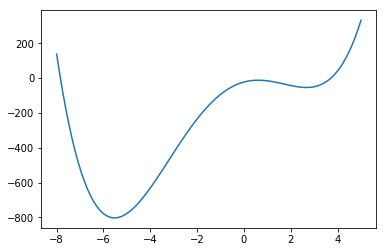

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy import optimize as opt
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1
x = np.linspace(-8, 5, 100) ##Example function 1
plt.plot(x, f(x));


In [3]:
opt.minimize_scalar(f, method='Brent')


     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

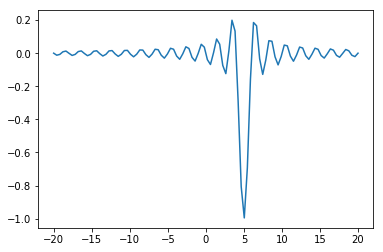

In [4]:
#Example 2
def f(x, offset):
    return -np.sinc(x-offset)
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));

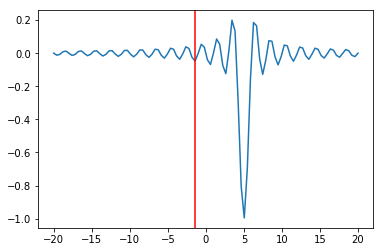

In [8]:
# note how additional function arguments are passed 
sol = opt.minimize_scalar(f, args=(5,))
sol

plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
pass


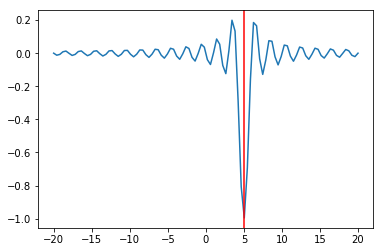

In [9]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

In [13]:
#Multivariate case https://en.wikipedia.org/wiki/Rosenbrock_function
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = 100*(y - x**2)**2 + (1 - x)**2 #https://en.wikipedia.org/wiki/Rosenbrock_function

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
H, N(H.condition_number())

(Matrix([
 [ 802, -400],
 [-400,  200]]), 2508.00960127744)

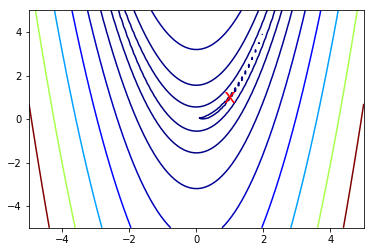

In [14]:


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);


In [15]:
from scipy.optimize import rosen, rosen_der, rosen_hess
x0 = np.array([4,-4.1])

ps = [x0]
opt.minimize(rosen, x0, method='BFGS')

      fun: 9.48988612333806e-12
 hess_inv: array([[0.49995593, 0.99988908],
       [0.99988908, 2.00468039]])
      jac: array([ 4.39252450e-05, -2.03651389e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 540
      nit: 56
     njev: 132
   status: 2
  success: False
        x: array([0.99999712, 0.99999413])

### Newton's method

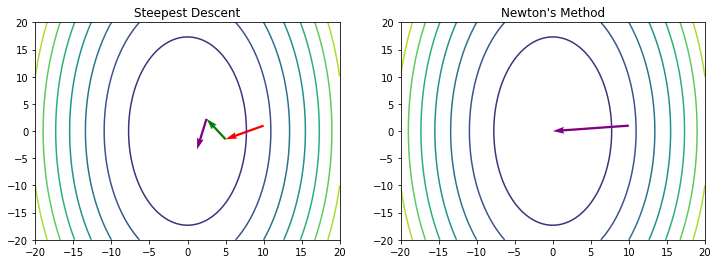

In [26]:
def Quad(x):
    return ((x[1:])**2.0 + 5*(x[:-1])**2.0)

def DQuad(x,y):
    return (np.array([2.0*x,10.0*y]))

x = np.linspace(-20,20, 100)
y = np.linspace(-20,20, 100)
X, Y = np.meshgrid(x, y)
Z = Quad(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
Hinv=-np.array([[0.5,0],[0,0.1]])
plt.figure(figsize=(12,4))
plt.subplot(121)

plt.contour(X,Y,Z);
plt.title("Steepest Descent");
step=-0.25
X0 = 10.0
Y0 = 1.0

Ngrad=Hinv.dot(DQuad(X0,Y0))

sgrad = step*DQuad(X0,Y0)
plt.quiver(X0,Y0,sgrad[0],sgrad[1],color='red',angles='xy',scale_units='xy',scale=1);
X1 = X0 + sgrad[0]
Y1 = Y0 + sgrad[1]
sgrad = step*DQuad(X1,Y1)
plt.quiver(X1,Y1,sgrad[0],sgrad[1],color='green',angles='xy',scale_units='xy',scale=1);
X2 = X1 + sgrad[0]
Y2 = Y1 + sgrad[1]
sgrad = step*DQuad(X2,Y2)
plt.quiver(X2,Y2,sgrad[0],sgrad[1],color='purple',angles='xy',scale_units='xy',scale=1);


plt.subplot(122)
plt.contour(X,Y,Z);
plt.title("Newton's Method")
plt.quiver(X0,Y0,Ngrad[0],Ngrad[1],color='purple',angles='xy',scale_units='xy',scale=1);

#Compute Hessian and plot again.


### Logistic Regression via Gradient descent

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


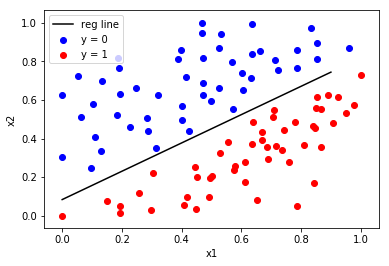

In [28]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 


def loadCSV(filename): 
	''' 
	function to load dataset 
	'''
	with open(filename,"r") as csvfile: 
		lines = csv.reader(csvfile) 
		dataset = list(lines) 
		for i in range(len(dataset)): 
			dataset[i] = [float(x) for x in dataset[i]]	 
	return np.array(dataset) 


def normalize(X): 
	''' 
	function to normalize feature matrix, X 
	'''
	mins = np.min(X, axis = 0) 
	maxs = np.max(X, axis = 0) 
	rng = maxs - mins 
	norm_X = 1 - ((maxs - X)/rng) 
	return norm_X 


def logistic_func(beta, X): 
	''' 
	logistic(sigmoid) function 
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 


def log_gradient(beta, X, y): 
	''' 
	logistic gradient function 
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
	final_calc = np.dot(first_calc.T, X) 
	return final_calc 


def cost_func(beta, X, y): 
	''' 
	cost function, J 
	'''
	log_func_v = logistic_func(beta, X) 
	y = np.squeeze(y) 
	step1 = y * np.log(log_func_v) 
	step2 = (1 - y) * np.log(1 - log_func_v) 
	final = -step1 - step2 
	return np.mean(final) 


def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
	''' 
	gradient descent function 
	'''
	cost = cost_func(beta, X, y) 
	change_cost = 1
	num_iter = 1
	
	while(change_cost > converge_change): 
		old_cost = cost 
		beta = beta - (lr * log_gradient(beta, X, y)) 
		cost = cost_func(beta, X, y) 
		change_cost = old_cost - cost 
		num_iter += 1
	
	return beta, num_iter 


def pred_values(beta, X): 
	''' 
	function to predict labels 
	'''
	pred_prob = logistic_func(beta, X) 
	pred_value = np.where(pred_prob >= .5, 1, 0) 
	return np.squeeze(pred_value) 


def plot_reg(X, y, beta): 
	''' 
	function to plot decision boundary 
	'''
	# labelled observations 
	x_0 = X[np.where(y == 0.0)] 
	x_1 = X[np.where(y == 1.0)] 
	
	# plotting points with diff color for diff label 
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
	x1 = np.arange(0, 1, 0.1) 
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
	plt.plot(x1, x2, c='k', label='reg line') 

	plt.xlabel('x1') 
	plt.ylabel('x2') 
	plt.legend() 
	plt.show() 
	

	
if __name__ == "__main__": 
	# load the dataset 
	dataset = loadCSV('dataset1.csv') 
	
	# normalizing feature matrix 
	X = normalize(dataset[:, :-1]) 
	
	# stacking columns wth all ones in feature matrix 
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 

	# response vector 
	y = dataset[:, -1] 
    

    

	# initial beta values 
	beta = np.matrix(np.zeros(X.shape[1])) 

	# beta values after running gradient descent 
	beta, num_iter = grad_desc(X, y, beta) 

	# estimated beta values and number of iterations 
	print("Estimated regression coefficients:", beta) 
	print("No. of iterations:", num_iter) 

	# predicted labels 
	y_pred = pred_values(beta, X) 
	
	# number of correctly predicted labels 
	print("Correctly predicted labels:", np.sum(y == y_pred)) 
    
    
	# plotting regression line 
	plot_reg(X, y, beta) 


## Stochastic Gradient Descent

In [10]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=5, random_state=11)

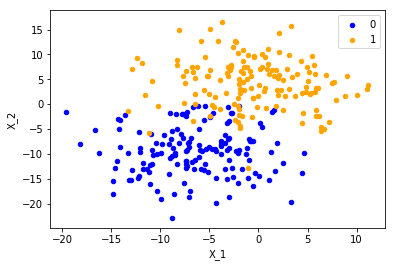

In [11]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [12]:
##Splitting into batches

def next_batch(X, Y, batch_size):
    for i in np.arange(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], Y[i:i + batch_size])

In [13]:
X = np.c_[np.ones((X.shape[0])), X]
X.shape


(300, 3)

In [14]:
##Basic components of logistic regression

import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hx(W,X):
    return sigmoid(np.dot(X,W))

In [15]:
## loss function 

def cost(W, X, Y):
    y_pred = hx(W,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

In [16]:
## Stochastic gradient computation for logistic regression

def grad(W, X, Y):
    y_pred = hx(W,X)
    A = (Y*(1-y_pred) - (1-Y)*y_pred)
    g = -1* np.dot(A.T,X)
    return g

In [17]:
#SGD algorithm implementation:

def sgd(W_new, W_prev, lr, batch_size, epochs):
    X_, Y_ = shuffle(X, Y, random_state=0)
    for e in range(epochs):
        epoch_loss = []
        X_, Y_ = shuffle(X_, Y_, random_state=0)
        for (batchX, batchY) in next_batch(X_, Y_, batch_size):
            W_prev = W_new
            epoch_loss.append(cost(W_prev, batchX, batchY))
            gradients = grad(W_prev, batchX, batchY)
            W_new = W_prev - lr*gradients
        print(np.average(epoch_loss))
    return W_new

In [23]:
### Using the above components to train logistic regression:


##Initialization:

W = np.random.uniform(size=(X.shape[1],))
W.shape

print(W)
W = sgd(W, W, 0.009, 32, 200)
print(W)


[0.77991775 0.02331556 0.84899797]
6.498182180129343
5.777232894323327
5.655303960737199
5.481892737590458
5.677500784139035
5.295994017898876
5.277469447088285
5.064403032719396
5.451400402385184
5.069410148565693
5.099225457727493
5.029126122248208
5.233119510799842
4.990232387237816
5.047486073482712
5.115606508112497
5.244185475319991
5.331916245745611
5.238236114533724
4.9319777234026585
5.141540342614613
4.865831205559703
5.159778411740726
4.985292618347131
5.076352146579746
5.257924075926851
5.152610927940583
5.3764733397061715
5.018098364357783
4.917605651889218
5.155716287841686
4.778596405367458
5.1709659868122415
4.982156178718649
5.065517558648479
5.130335715476148
5.056040918005001
4.751593495999746
5.0448354125758
5.200126052942511
5.286000311573004
4.696110935198589
5.1110576132589305
4.929274485122772
5.508649196367244
4.929556256007245
5.358525468084486
5.109893557072356
5.268928758977754
5.055373536882217
5.12711947861998
5.256195499975499
5.201749791075562
5.29705784

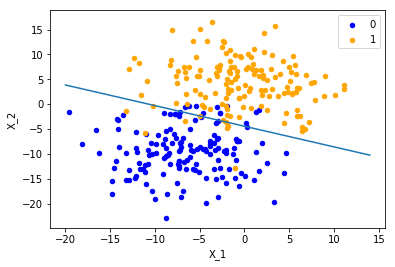

In [24]:
## Plotting the results:

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-W[0]-W[1]*x)/W[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## L1 regularized Logistic Regression

In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# Load the iris dataset
iris = datasets.load_iris()

# Create X from the features
X = iris.data

# Create y from output
y = iris.target

# Remake the variable, keeping all data where the category is not 2.
X = X[y != 2]
y = y[y != 2]

In [42]:
# View the target data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [44]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [45]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[-0.01656126 -3.82917178  4.35342698  0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 1
Coefficient of each feature: [[ 0.         -2.27439538  2.56757735  0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.1
Coefficient of each feature: [[ 0.         -0.82148045  0.97189728  0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.001
Coefficient of each feature: [[0. 0. 0. 0.]]
Training accuracy: 0.5
Test accuracy: 0.5



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
clf.coef_

array([[ 0.        , -2.2743499 ,  2.56793814,  0.        ]])

### LASSO - L1-regularized linear regression

In [49]:
# Import libraries
import numpy as np
import pandas as pd
# Upload the dataset
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
print(diamonds.cut.unique())
print(diamonds.clarity.unique())
print(diamonds.color.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [51]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()
# Convert the variables to numerical
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [52]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Create features and target matrixes
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]
# Scale data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [53]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(X, y)
ridge.fit(X, y)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y))
print("ridge score:",ridge.score(X, y))
print("lasso MSE:", mean_squared_error(y, lasso.predict(X)))
print("ridge MSE:", mean_squared_error(y, ridge.predict(X)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.8850606039595762
ridge score: 0.8850713120355513
lasso MSE: 1829298.919415987
ridge MSE: 1829128.4968064611
lasso coef: [ 5159.45245224  -217.84225841  -207.20956411 -1250.0126333
    16.16031486    -0.           496.17780105    72.11296318
  -451.28351376]
ridge coef: [[ 5.20114712e+03 -2.20844296e+02 -2.08496831e+02 -1.32579812e+03
   5.36297456e+01 -1.67310953e+00  4.96434236e+02  7.26648505e+01
  -4.53187286e+02]]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')

# Fit models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)
gridridge.fit(X_train, y_train)
linear.fit(X_train, y_train)
print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("ridge score:", gridridge.score(X_test, y_test))
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

ridge best parameters: {'alpha': 24.0}
lasso best parameters: {'alpha': 1.5000000000000002}
ridge score: 0.8859432689353808
lasso score: 0.8863841649966073
linear score: 0.8859249267960946
ridge MSE: 1812127.070909156
lasso MSE: 1805122.1385342914
linear MSE: 1812418.4898094584
ridge best estimator coef: [[ 5077.4918518   -196.88661067  -208.02757232 -1267.11393653
    208.75255168   -91.36220706   502.04325405    74.65191115
   -457.7374841 ]]
lasso best estimator coef: [ 5093.28644126  -207.62814092  -206.99498254 -1234.01364376
    67.46833024    -0.           501.11520439    73.73625478
  -457.08145762]
linear coef: [[ 5155.92874335  -208.70209498  -208.16287626 -1439.0942139
    243.82503796   -28.79983655   501.31962765    73.93030707
   -459.94636759]]


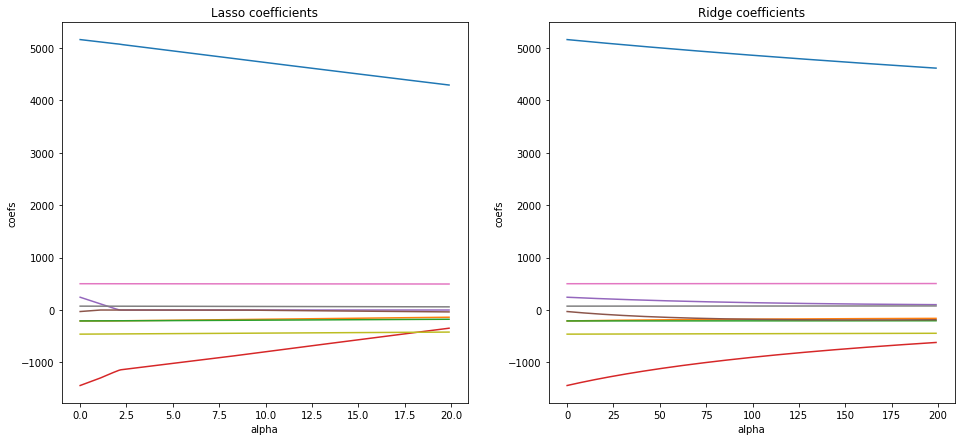

In [55]:
# Import library for visualization
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_[0])

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()